# Actividad \#10 (Ingeniería de datos masivos)
### Equipo 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

data = pd.read_csv("/content/drive/MyDrive/Documentos/Universidad Tecmilenio/Ingeniería de datos masivos/Módulo #3/Actividad #10/sales-of-shampoo.csv")

In [ ]:
#Convirtiendo a fechas y poniendo índice de fechas

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data

,Sales
Month,
2011-01-01,266.0
2011-02-01,145.9
2011-03-01,183.1
2011-04-01,119.3
2011-05-01,180.3
2011-06-01,168.5
2011-07-01,231.8
2011-08-01,224.5
2011-09-01,192.8


## Descripción del dataset
Este dataset descripe el número mensual de ventas de shampoo en un periodo de de 3 años. El dataset tiene 36 observaciones.

## Estacionalidad

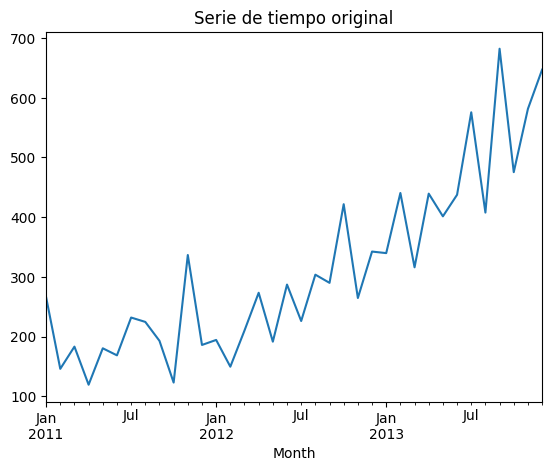

In [ ]:
# Visualiza la serie de tiempo original
data['Sales'].plot(title='Serie de tiempo original')
plt.show()

In [ ]:
# Prueba de estacionariedad
resultado_adf = adfuller(data['Sales'])
print('Estadísticas de la Prueba ADF:', resultado_adf[0])
print('Valor p:', resultado_adf[1])
print('Valores Críticos:', resultado_adf[4])

Estadísticas de la Prueba ADF: 3.060142083641181
Valor p: 1.0
Valores Críticos: {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}


In [ ]:
# Se aplica la diferenciación para hacer la serie estacionaria
resultado_adf = adfuller(data['Sales'])

data['Sales_diferenciadas'] = data['Sales'].diff(1)
data['Sales_diferenciadas'].fillna(data['Sales_diferenciadas'].mean(), inplace=True)

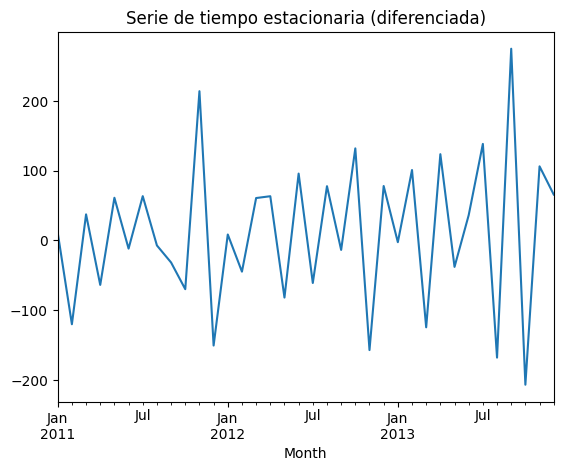

Estadísticas de la prueba ADF (diff): -6.982524367299734
Valor p (diff): 8.12302651163121e-10
Valores críticos (diff): {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}


In [ ]:
# Visualiza la serie de tiempo después de la diferenciación
data['Sales_diferenciadas'].plot(title='Serie de tiempo estacionaria (diferenciada)')
plt.show()

# Prueba de estacionariedad en la serie diferenciada
resultado_adf_diff = adfuller(data['Sales_diferenciadas'])
print('Estadísticas de la prueba ADF (diff):', resultado_adf_diff[0])
print('Valor p (diff):', resultado_adf_diff[1])
print('Valores críticos (diff):', resultado_adf_diff[4])

In [ ]:
# Ajusta el modelo ARIMA automáticamente sin variables exógenas
modelo_arima = auto_arima(data['Sales_diferenciadas'], seasonal=True, stepwise=True, suppress_warnings=True, exogenous=None)
ajuste = modelo_arima.fit(data['Sales_diferenciadas'])

## Resumen del modelo ARIMA

In [ ]:
print(ajuste.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -204.322
Date:                Wed, 22 Nov 2023   AIC                            416.644
Time:                        03:54:59   BIC                            422.978
Sample:                    01-01-2011   HQIC                           418.855
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.1733      7.514      2.153      0.031       1.447      30.900
ar.L1         -0.5269      0.207     -2.540      0.011      -0.934      -0.120
ma.L1         -0.4376      0.219     -1.997      0.0

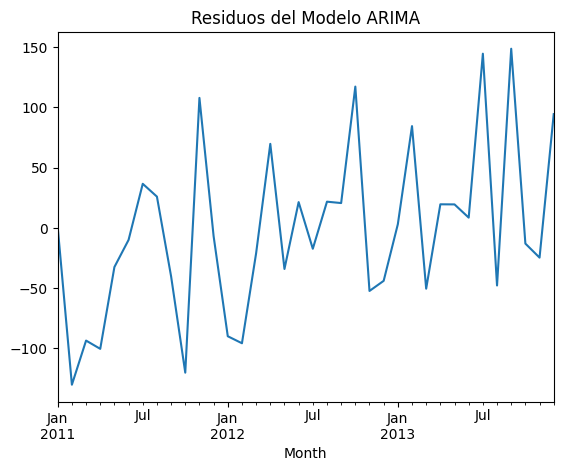

In [ ]:
residuos = ajuste.resid()
residuos.plot(title='Residuos del Modelo ARIMA')
plt.show()